<a href="https://colab.research.google.com/github/JoeBwonKenobi/Sales-Prediction-Project/blob/main/Sales_Project_Models%26Final_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sales Prediction Project**

Joe Lardie

Dec 2022

#**Overview of Project**

#**Part 1**

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

#**Part 2**

Your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

Download the data using this link: download the data. (Note: Original data source).
Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset

Link to the original dataset on Kaggle

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

# **Part 3**
Your task is to complete any statistical analyses that might help you understand, explain, or model with your data.

This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

# **Part 4**
your task is to build several data visualizations to help your stakeholders better understand trends in the data.

Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.

Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).

Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

# **Part 5**
Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

Perform a train test split

Create a preprocessing object to prepare the dataset for Machine Learning
Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

# **Part 6**
Build a linear regression model to predict sales.

Build a linear regression model. Evaluate the performance of your model based on r^2. Evaluate the performance of your model based on rmse.

Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model. Compare the performance of your model based on r^2. Compare the performance of your model based on rmse.

You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend? Justify your recommendation.

##**Data Dictionary**

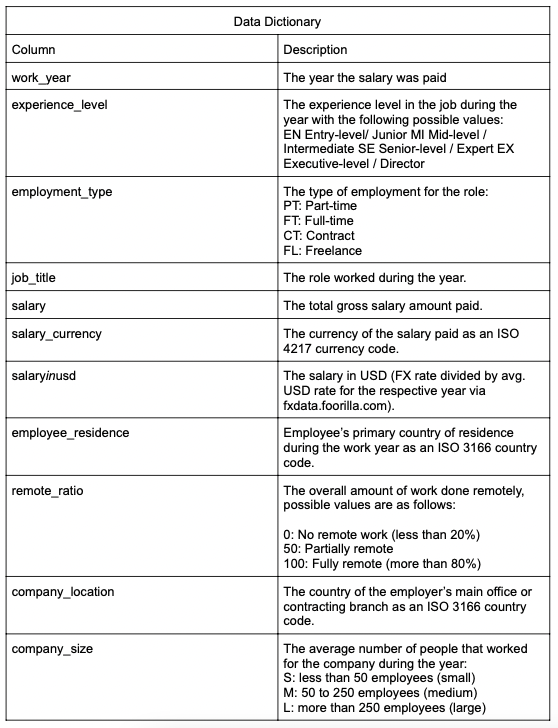

##**Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt

#Preprocessor
from numpy import median
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Set global scikit-learn configuration
from sklearn import set_config

#Display estimators as a diagram
set_config(display='diagram')

#Warnings
import warnings
warnings.filterwarnings("ignore")

##**Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
sales_df= pd.read_csv('/content/sales_predictions.csv')
sales_df.info()
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##**Data Cleaning**

In [4]:
#Rows & Column count: 12 colums and 8523 rows
#Data types of each variable.
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#Number of Duplicates
sales_df.duplicated().sum()

0

In [6]:
sales_df[sales_df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [7]:
#Addressing missing values
sales_df['Item_Weight'].fillna(value = median, inplace = True)
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
sales_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
#Confirm no missing values
sales_df['Outlet_Size'].fillna(value = 'Medium', inplace =True)
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
#Find any inconsistancies
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
#Fixing the inconsistancies
sales_df.replace({'LF': 'Low Fat','reg': 'Regular','low fat': 'Low Fat'}, inplace = True)
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
#Searching through coloumns for inconsistancies
sales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
#Continued search
sales_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [15]:
#Continued search
sales_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
#continued search
sales_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
#Summary data for min, max, mean
sales_df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


#**Part 3**

Your task is to complete any statistical analyses that might help you understand, explain, or model with your data.

This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

###**Exploritory Visuals**

###**Creating a Histogram**

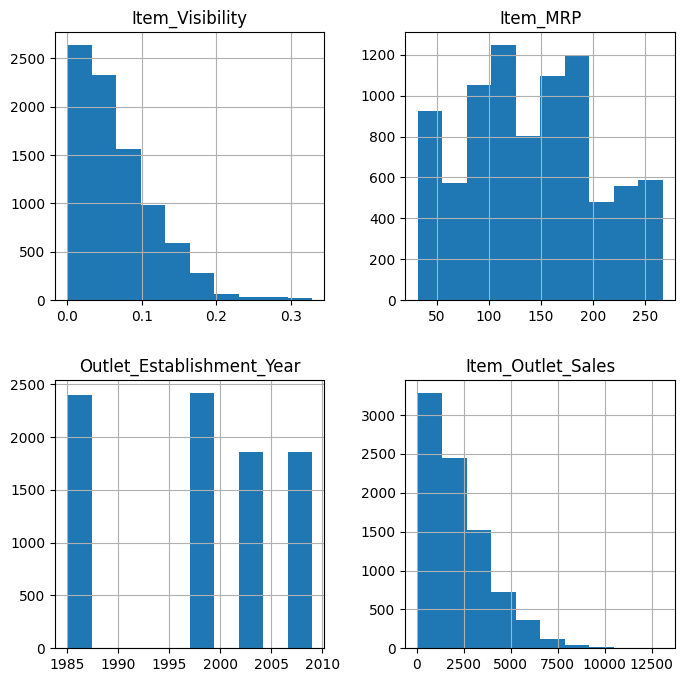

In [18]:
#Histograms:
sales_df.hist(figsize=(8,8));

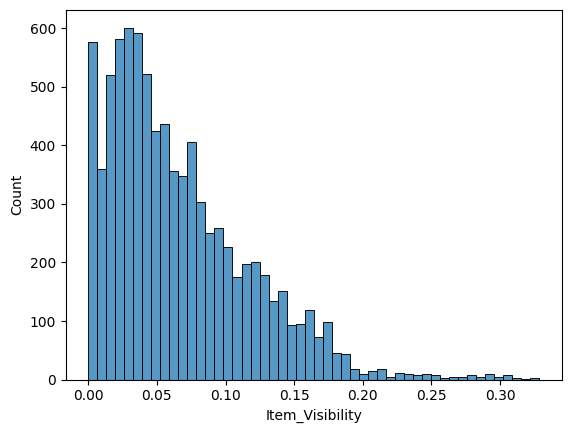

In [19]:
#Create a histogram for Item Visibility
sns.histplot(data=sales_df, x='Item_Visibility');

- Item visibilty is skewed to the right. It is positively skewed more toward the mean than the mode and median. The mode is less than 600.

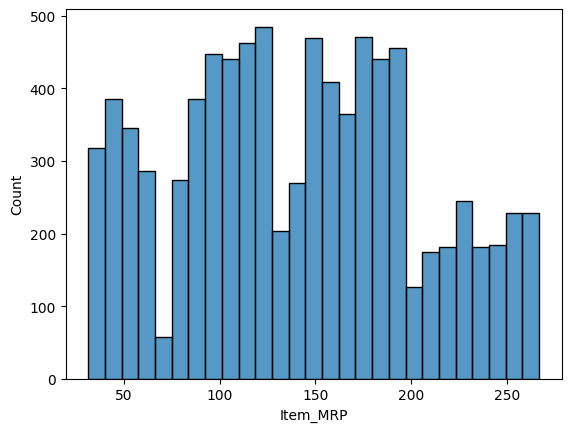

In [20]:
#Create a histogram for Item MRP
sns.histplot(data=sales_df, x='Item_MRP');

- Item MRP has non-symetric bimodal distribution. Item MRP has two modes. The first is 475 the second at 455.

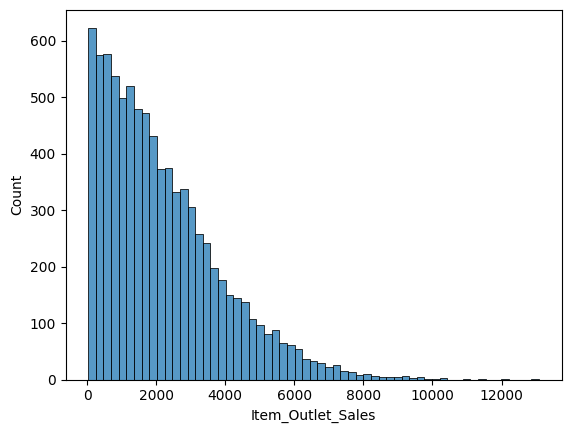

In [21]:
#Create a histogram for Item Outlet Sales
sns.histplot(data=sales_df, x='Item_Outlet_Sales');

- Item outlet sales is right skewed. It is positively skewed more towards the mean, than the mode or median. The mode is greater then 600.

###**Explanitory Visuals**

###**Creating a boxplot**

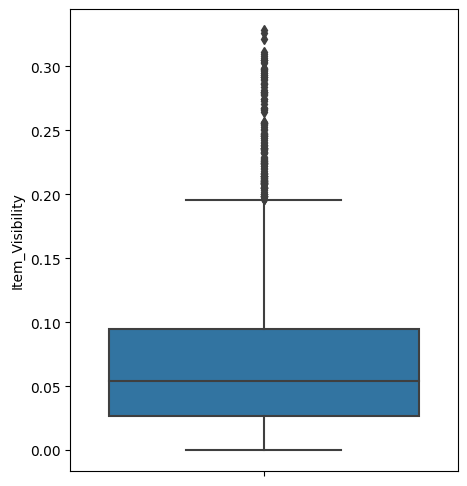

In [22]:
fig,ax=plt.subplots(figsize= (5,6))
sns.boxplot(data=sales_df, y= 'Item_Visibility');

- Item visibility has a median of about .05. It also has multiple outliers above .20.

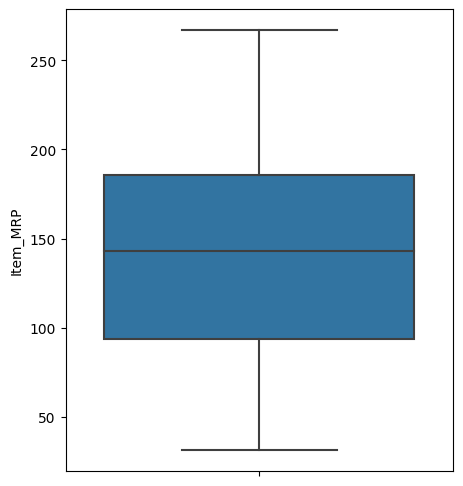

In [23]:
fig,ax=plt.subplots(figsize= (5,6))
sns.boxplot(data=sales_df, y= 'Item_MRP');

- Item MRP has a median of about 140 and has no outliers.

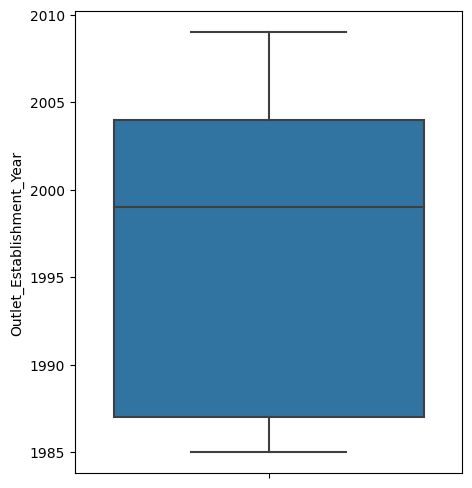

In [24]:
fig,ax=plt.subplots(figsize= (5,6))
sns.boxplot(data=sales_df, y= 'Outlet_Establishment_Year');

- Outlet Establishment Year has a median below 2000 with no outliers.

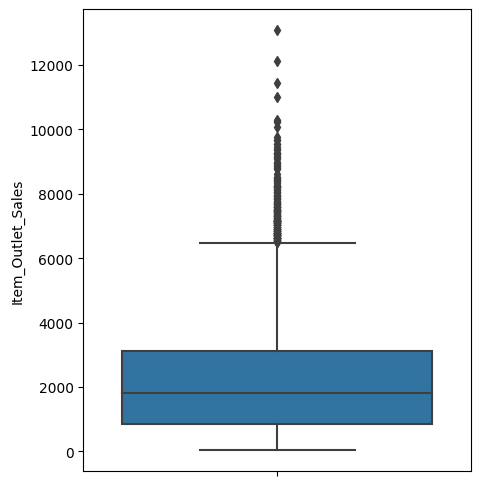

In [25]:
fig,ax=plt.subplots(figsize= (5,6))
sns.boxplot(data=sales_df, y= 'Item_Outlet_Sales');

- Item outlet sales has a median of about 1900, and multiple outliers above 6000.

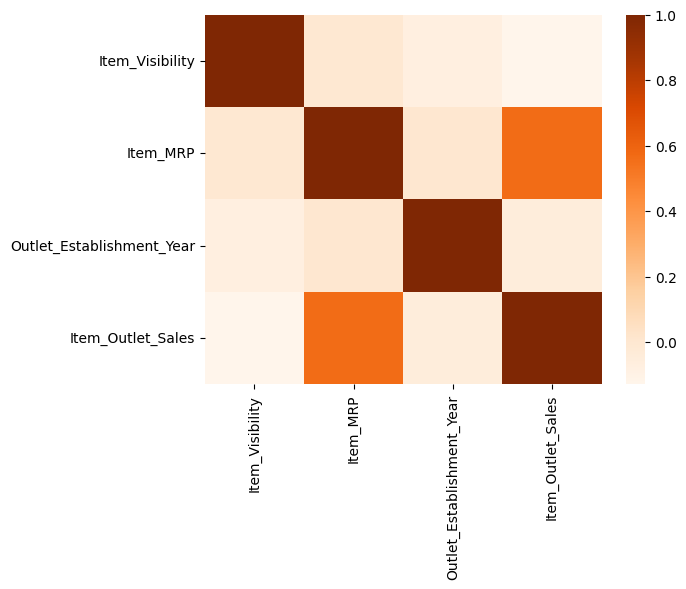

In [26]:
#Create a heatmap of the dataframe.
sales_df.corr()
corr=sales_df.corr()
sns.heatmap(corr, cmap = 'Oranges');

#**Part 4**

###**Other Explanitory Visuals**

- your task is to build several data visualizations to help your stakeholders better understand trends in the data.
- Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- Build on your previous cleaning, exploration, and analysis.

- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

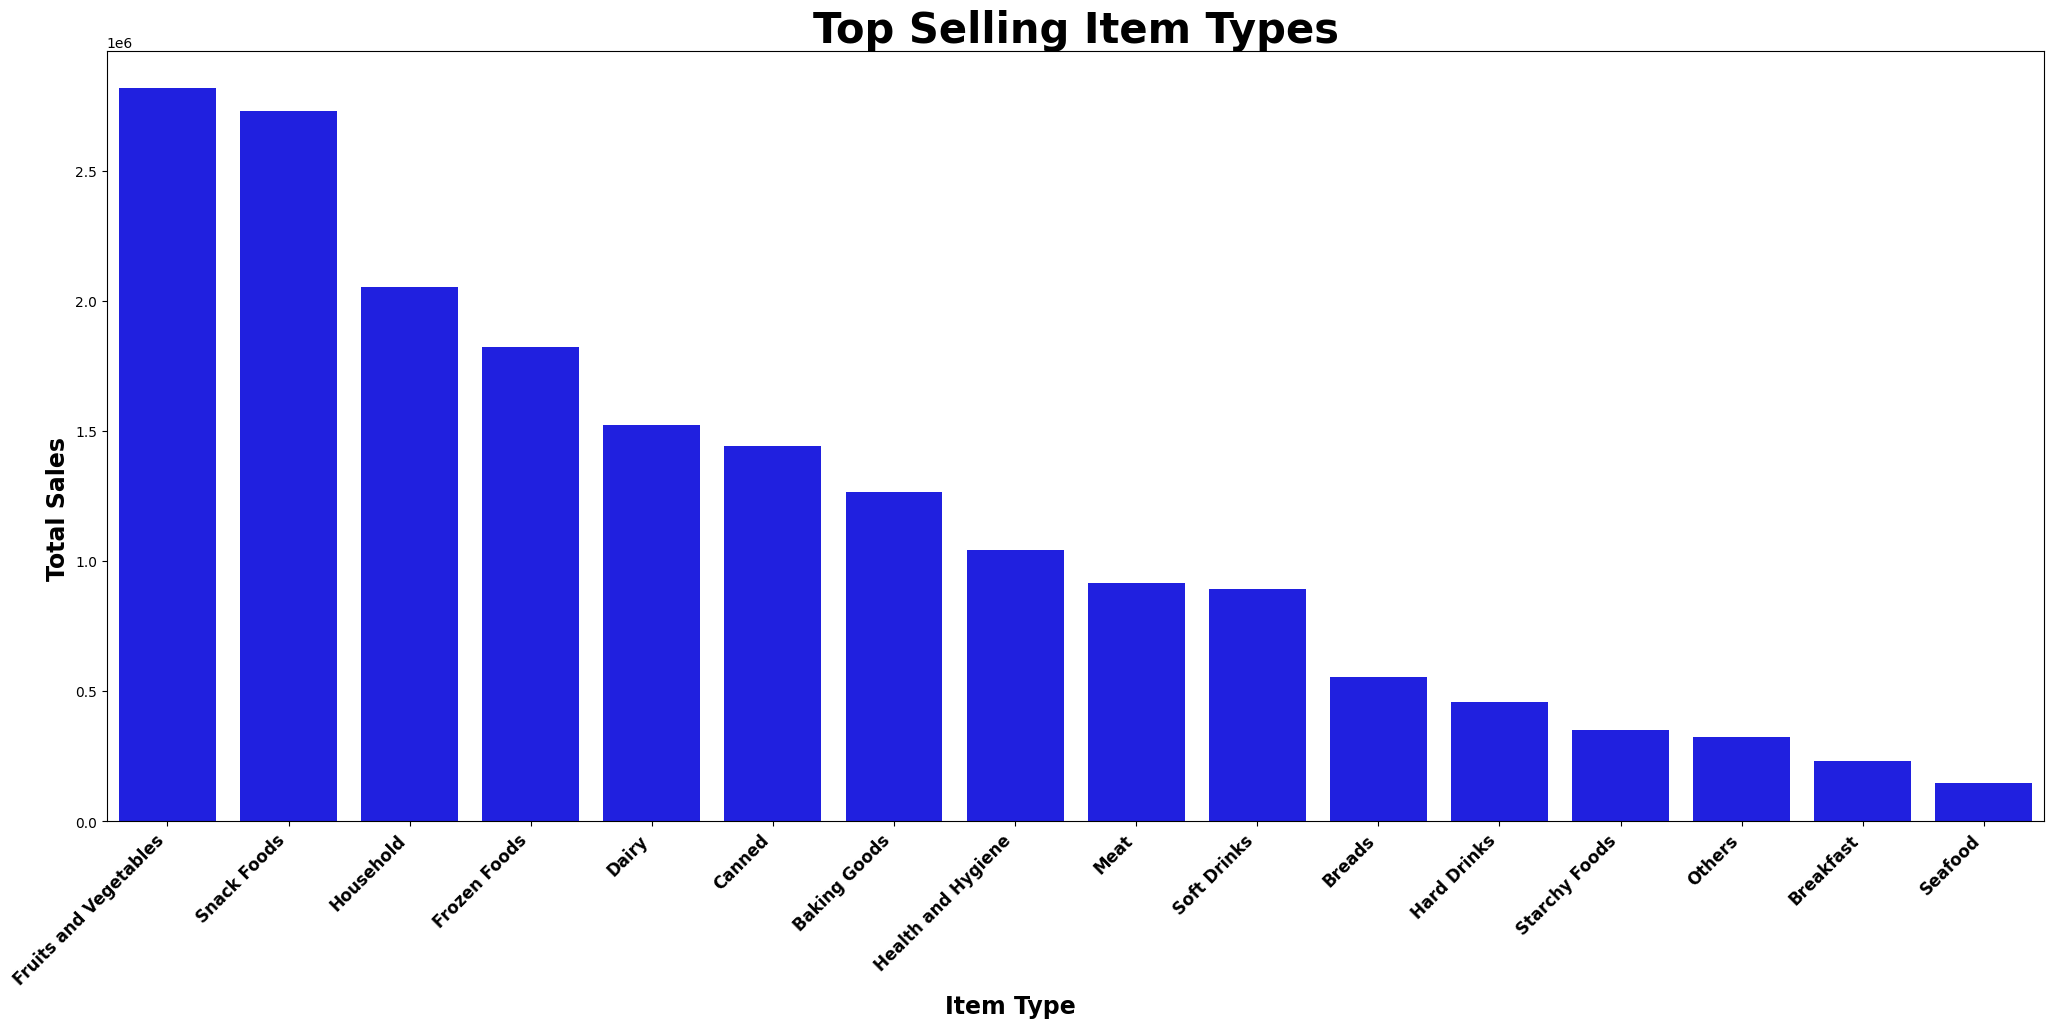

In [27]:
# Set the figure size
plt.figure(figsize=(25, 10));

# Reorder this data frame
df = sales_df.sort_values(['Item_Outlet_Sales'], ascending=False).reset_index(drop=True);

# Make a barplot
sns.barplot(
    x="Item_Type",
    y="Item_Outlet_Sales",
    data=df,
    estimator=sum,
    ci=None,
    order =['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods', 'Health and Hygiene','Meat','Soft Drinks','Breads','Hard Drinks','Starchy Foods','Others','Breakfast','Seafood'],
    color='Blue');
# Add title and axis names
plt.xticks(rotation=45, fontsize = 12, fontweight = 'bold', ha = 'right');
plt.title('Top Selling Item Types',fontweight='bold', color = 'Black', fontsize='30', horizontalalignment='center');
plt.xlabel('Item Type',fontweight='bold', fontsize='17', horizontalalignment='right');
plt.ylabel('Total Sales',fontweight='bold', fontsize='17', horizontalalignment='right');
# add a white background to the visualization
fig.patch.set_facecolor('white')

# save the visualization as an image
plt.savefig('visualization.png')
plt.show()


**Interpretation:**

- The top selling Item type was fruits and vegtables, closely followed by snack

foods. Dairy placed fifth infront of canned foods. while breakfast and seafood

were the two lowest.

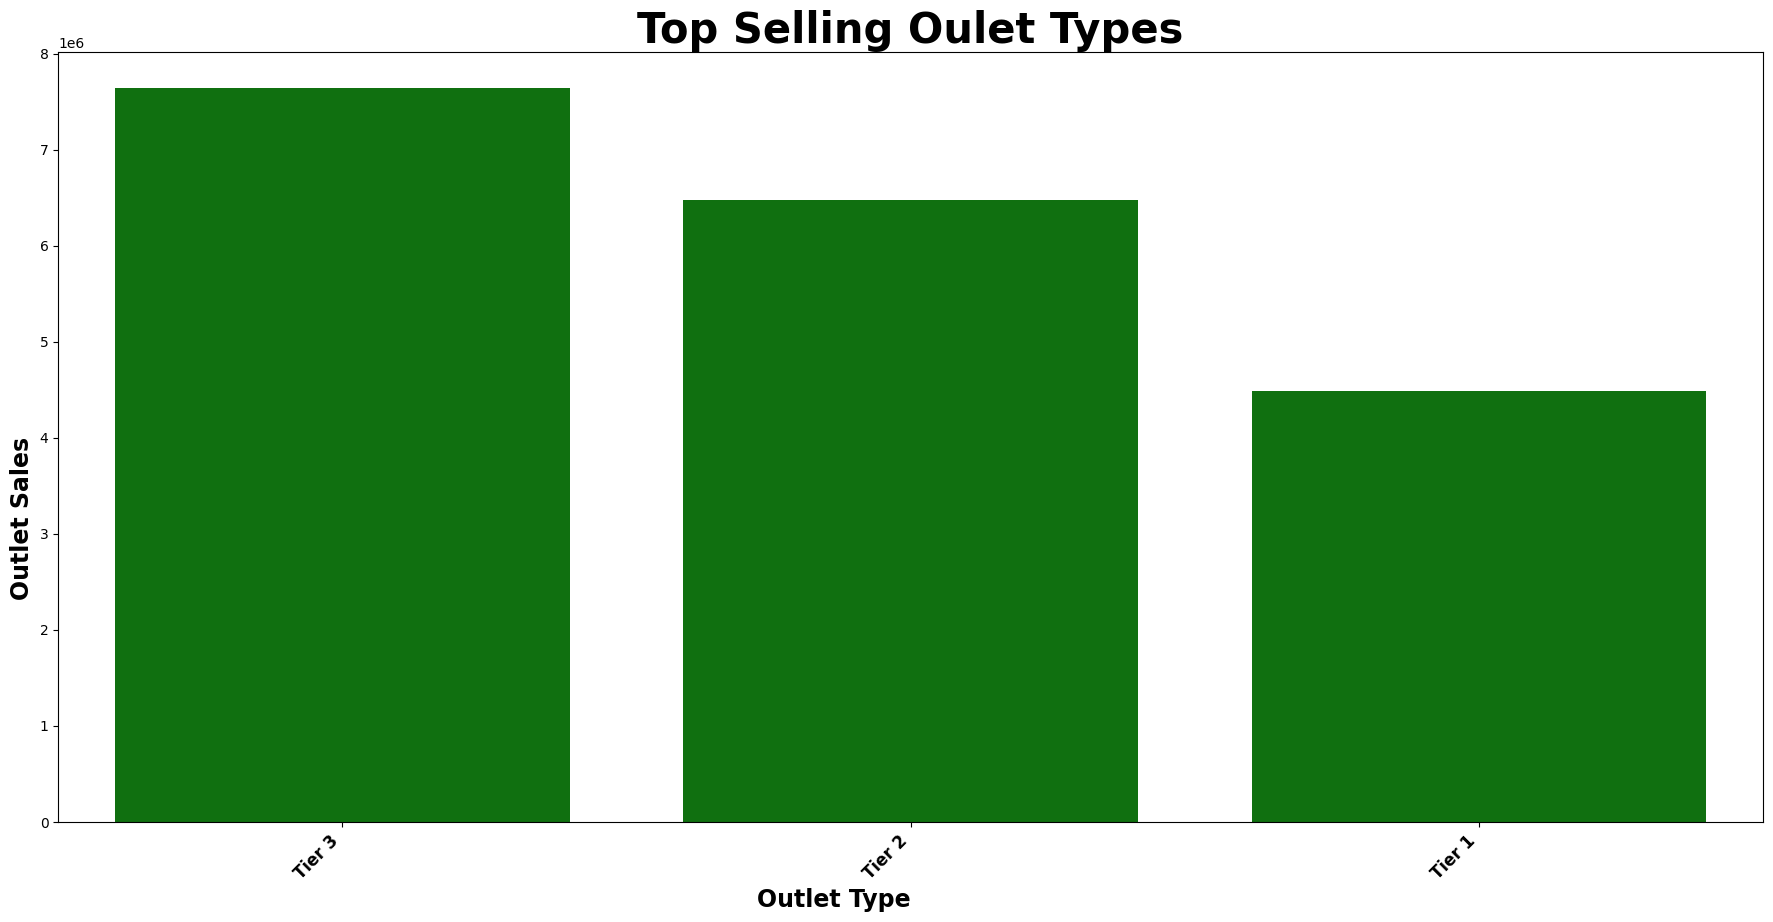

In [28]:
# Set the figure size
plt.figure(figsize=(22, 10));

# Reorder this data frame
df = sales_df.sort_values(['Outlet_Location_Type'], ascending=False).reset_index(drop=True);

# Make a barplot
sns.barplot(
    x="Outlet_Location_Type",
    y="Item_Outlet_Sales",
    data=df,
    estimator=sum,
    ci=None,
    color='green');
# Add title and axis names
plt.xticks(rotation=45, fontsize = 12, fontweight = 'bold', ha = 'right');
plt.title('Top Selling Oulet Types',fontweight='bold', color = 'Black', fontsize='30', horizontalalignment='center');
plt.xlabel('Outlet Type',fontweight='bold', fontsize='17', horizontalalignment='right');
plt.ylabel('Outlet Sales',fontweight='bold', fontsize='17', horizontalalignment='right');
# add a white background to the visualization
fig.patch.set_facecolor('white')

# save the visualization as an image
plt.savefig('visualization.png')
plt.show()
plt.show()

Interpretation:
- Here we see that the top selling outlet type was that of tier 3, followed by tier 2, and then tier 1 was the lowest selling outlet type.

#**Part 5**

###**Loading Data**

In [29]:
#load Data
df= pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
# dataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
#Creating a copy of the DataFrame
eda_ml = df.copy()

In [32]:
#Print missing values
eda_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
eda_ml.duplicated().sum()

0

There are no duplicates

In [34]:
#Display descriptive stats for all columns
eda_ml.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


###**Split the data(Validation Split)**

In [35]:
#Split X and y
X = eda_ml.drop(columns = 'Item_Outlet_Sales')
y = eda_ml['Item_Outlet_Sales']

In [36]:
#Split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###**Create a preprocessing object to prepare the dataset for Machine Learning**

In [37]:
#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy= 'mean')
#Scaler
scaler = StandardScaler()
#OneHotEncoder
ohe =OneHotEncoder(handle_unknown='ignore', sparse=False)

In [38]:
#Create Selectors
cat_selector = make_column_selector(dtype_include= 'object')
num_selector = make_column_selector(dtype_include='number')

In [39]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [40]:
#cat pipe
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [41]:
#Make tuples for preprocessing the categorical and numeric columns
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)

In [42]:
#Create Column Transformer
preprocessor= make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [43]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205fa00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205f5e0>)])

In [44]:
#Fit Transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205fa00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205f5e0>)])

In [45]:
#Transform
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [46]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('shape of data is', X_test_processed.shape)
print('\n')
X_train_processed[:5]


0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1595)
shape of data is (2131, 1595)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       [-1.1692189 , -1.00493112, -0.95259072, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.52881915, -0.96548425, -0.33646004, ...,  1.        ,
         0.        ,  0.        ]])

###**Regression Model and regression tree**

This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

1. Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.
2. Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.
3. You now have tried 2 different models on your data set. You need to determine which model to implement.

4. Overall, which model do you recommend?
Justify your recommendation.

#**Part 6**

 Build a linear regression model to predict sales.

1. Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.
2. Your second task is to build a regression tree model to predict sales.

  Build a simple regression tree model.
  Compare the performance of your model based on r^2.
  Compare the performance of your model based on rmse.

3. You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.

In [47]:
#Preprocessor
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205fa00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205f5e0>)])

In [48]:
#Instantiate the model
reg = LinearRegression()
scaler = StandardScaler()

In [49]:
#Create Model Pipeline
reg_pipe = make_pipeline(scaler, reg)
reg_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [50]:
#Creating the model pipeline
linreg_pipe = make_pipeline(preprocessor, LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205fa00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205f5e0>)])),
                ('linearregression', LinearRegression())])

###**y_hat Predictions**

In [51]:
# Get predictions to use to evaluate model
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

In [52]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated

  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """

  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)


  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [53]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.672
  - MAE = 735.604
  - MSE = 971261.786
  - RMSE = 985.526

Results for testing data:
  - R^2 = -1.3626481644711636e+18
  - MAE = 159842750506.43
  - MSE = 3.759515337047367e+24
  - RMSE = 1938946966022.374



In [54]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205fa00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff1d205f5e0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [55]:
#create a range of max_depth values
depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)

  #fit the model
  tree_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

### Printing Out Scores from Decision Tree Loop

In [56]:
scores

,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582705,0.583937
5,0.604207,0.596056
...,...,...
76,0.999978,0.231661
77,0.999986,0.228608
78,0.999994,0.230258
79,0.999999,0.229625


###Plotting Scores for Decision Tree Train & Test Visually

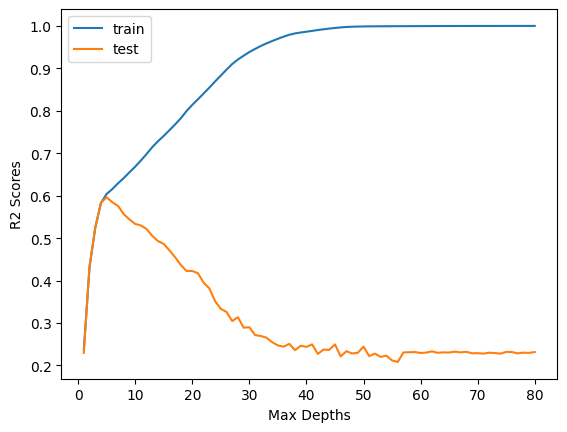

In [57]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [58]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

###**Reevaluating Decision Tree Regressor Model**

In [59]:
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=best_depth)

best_tree_pipe = make_pipeline(preprocessor, best_tree)

best_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_tree_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_tree_pipe.predict(X_test), split = 'testing')

Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.604
  - MAE = 761.978
  - MSE = 1171332.784
  - RMSE = 1082.281



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.596
  - MAE = 736.88
  - MSE = 1114471.115
  - RMSE = 1055.685



##**Fitting Random Forest Regressor Model**



In [60]:
rf_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
rf_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = rf_tree_pipe.predict(X_train)
y_hat_test = rf_tree_pipe.predict(X_test)

###**Random forest Regressior Model**

In [61]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.938
  - MAE = 296.898
  - MSE = 183359.734
  - RMSE = 428.205

Results for testing data:
  - R^2 = 0.551
  - MAE = 772.986
  - MSE = 1239893.293
  - RMSE = 1113.505



###**Untuned Random Forest Model Observations**

- Here, we see improved results as far as the regression metrics and the

  model's performance.
- This model still has some bias. However, this model has improved performance

   on the testing set.

- For the R^2 score 56.0% of the variance is explained.

- For the MAE the testing data is off by about $31,872.36.

###**Creating a Loop to Tune n_estimators for Random Forest Regressor Model**

In [62]:
#create a range of max_depth values
n_estimators = [86, 87, 88, 89, 90, 91, 92, 93, 94]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestRegressor(random_state = 42, n_estimators=n, max_depth = 5)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)

  #fit the model
  rf_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

###**Plotting Scores for Random Forest Train & Test Visually**

In [63]:
scores

,Train,Test
86,0.612266,0.603633
87,0.612301,0.603752
88,0.61229,0.603803
89,0.612273,0.603771
90,0.612245,0.603701
91,0.612229,0.603713
92,0.612176,0.603821
93,0.612165,0.603777
94,0.612155,0.603788


###**Best n_estimators for Random Forest Model**

In [64]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

92

###**Reevaluating Random Forest Regressor Model**

In [65]:
best_rf = RandomForestRegressor(random_state = 42, n_estimators=best_estimators, max_depth=5)

best_rf_pipe = make_pipeline(preprocessor, best_rf)

best_rf_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_rf_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_rf_pipe.predict(X_test), split = 'testing')

Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.612
  - MAE = 755.591
  - MSE = 1147748.288
  - RMSE = 1071.33



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.604
  - MAE = 728.039
  - MSE = 1093048.694
  - RMSE = 1045.49



###**Tuned (n_estimators) Random Forest Model Observations**
- We can see the best results as far as the regression metrics and the model's
  performance.

- This model still has some bias. However, this model has the best performance on the testing set.

- For the R^2 score 56.3% of the variance is explained.
For the MAE the testing score is off by about $31,998.94

#**Overall Recommendation**

Model performance

- Overall, the best model is definately the tuned Random Forrest Regression

  model. There was still some bias in the model, but by far it outperformed the linear regression model.